In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [30]:
!pip install --upgrade keras

In [3]:
!pip install torch

     -------------------------------------- 157.9/157.9 MB 2.2 MB/s eta 0:00:00


In [6]:
!pip install tensorflow

     -------------------------------------- 438.0/438.0 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 462.5/462.5 KB 2.1 MB/s eta 0:00:00


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 42.6/42.6 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB 3.1 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.8 MB/s eta 0:00:00
     -------------------------------------- 904.1/904.1 KB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 156.7/156.7 KB 1.9 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 KB 2.5 MB/s eta 0:00:00
     ------------------

## 1. Keras

In [2]:
from sklearn.datasets import load_iris

import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# from keras.optimizer_v2 import adam

import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
df = pd.DataFrame(iris.data) # 데이터의 변수를 데이터프레임으로 만들기
df.columns = iris.feature_names # 데이터 변수명 불러오기
df['species'] = iris.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X = df.drop('species', axis = 1).to_numpy()
Y = df['species'].to_numpy().reshape((-1,1))

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)

In [9]:
def build_model():
    model = models.Sequential()
    model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer = Adam(lr=0.001), loss='mse')
    return model

In [10]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,811
Trainable params: 1,811
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [11]:
history = model.fit(X_train, Y_train, epochs=400, batch_size = 32, verbose = 2)

Epoch 1/400
3/3 - 1s - loss: 0.4963 - 562ms/epoch - 187ms/step
Epoch 2/400
3/3 - 0s - loss: 0.3338 - 8ms/epoch - 3ms/step
Epoch 3/400
3/3 - 0s - loss: 0.3438 - 12ms/epoch - 4ms/step
Epoch 4/400
3/3 - 0s - loss: 0.3648 - 8ms/epoch - 3ms/step
Epoch 5/400
3/3 - 0s - loss: 0.3330 - 6ms/epoch - 2ms/step
Epoch 6/400
3/3 - 0s - loss: 0.2771 - 13ms/epoch - 4ms/step
Epoch 7/400
3/3 - 0s - loss: 0.2775 - 14ms/epoch - 5ms/step
Epoch 8/400
3/3 - 0s - loss: 0.2000 - 13ms/epoch - 4ms/step
Epoch 9/400
3/3 - 0s - loss: 0.2497 - 9ms/epoch - 3ms/step
Epoch 10/400
3/3 - 0s - loss: 0.2812 - 13ms/epoch - 4ms/step
Epoch 11/400
3/3 - 0s - loss: 0.2172 - 9ms/epoch - 3ms/step
Epoch 12/400
3/3 - 0s - loss: 0.1863 - 14ms/epoch - 5ms/step
Epoch 13/400
3/3 - 0s - loss: 0.1279 - 15ms/epoch - 5ms/step
Epoch 14/400
3/3 - 0s - loss: 0.1710 - 16ms/epoch - 5ms/step
Epoch 15/400
3/3 - 0s - loss: 0.1829 - 13ms/epoch - 4ms/step
Epoch 16/400
3/3 - 0s - loss: 0.1378 - 12ms/epoch - 4ms/step
Epoch 17/400
3/3 - 0s - loss: 0.158

Epoch 136/400
3/3 - 0s - loss: 0.1027 - 13ms/epoch - 4ms/step
Epoch 137/400
3/3 - 0s - loss: 0.0932 - 8ms/epoch - 3ms/step
Epoch 138/400
3/3 - 0s - loss: 0.0891 - 7ms/epoch - 2ms/step
Epoch 139/400
3/3 - 0s - loss: 0.0835 - 10ms/epoch - 3ms/step
Epoch 140/400
3/3 - 0s - loss: 0.0973 - 8ms/epoch - 3ms/step
Epoch 141/400
3/3 - 0s - loss: 0.0738 - 8ms/epoch - 3ms/step
Epoch 142/400
3/3 - 0s - loss: 0.0836 - 8ms/epoch - 3ms/step
Epoch 143/400
3/3 - 0s - loss: 0.0613 - 8ms/epoch - 3ms/step
Epoch 144/400
3/3 - 0s - loss: 0.0653 - 10ms/epoch - 3ms/step
Epoch 145/400
3/3 - 0s - loss: 0.0847 - 9ms/epoch - 3ms/step
Epoch 146/400
3/3 - 0s - loss: 0.0532 - 9ms/epoch - 3ms/step
Epoch 147/400
3/3 - 0s - loss: 0.0527 - 11ms/epoch - 4ms/step
Epoch 148/400
3/3 - 0s - loss: 0.1082 - 10ms/epoch - 3ms/step
Epoch 149/400
3/3 - 0s - loss: 0.0776 - 7ms/epoch - 2ms/step
Epoch 150/400
3/3 - 0s - loss: 0.0721 - 9ms/epoch - 3ms/step
Epoch 151/400
3/3 - 0s - loss: 0.0868 - 6ms/epoch - 2ms/step
Epoch 152/400
3/3 -

Epoch 270/400
3/3 - 0s - loss: 0.1048 - 12ms/epoch - 4ms/step
Epoch 271/400
3/3 - 0s - loss: 0.0933 - 6ms/epoch - 2ms/step
Epoch 272/400
3/3 - 0s - loss: 0.0630 - 9ms/epoch - 3ms/step
Epoch 273/400
3/3 - 0s - loss: 0.0965 - 10ms/epoch - 3ms/step
Epoch 274/400
3/3 - 0s - loss: 0.0796 - 8ms/epoch - 3ms/step
Epoch 275/400
3/3 - 0s - loss: 0.0999 - 7ms/epoch - 2ms/step
Epoch 276/400
3/3 - 0s - loss: 0.0684 - 9ms/epoch - 3ms/step
Epoch 277/400
3/3 - 0s - loss: 0.0843 - 8ms/epoch - 3ms/step
Epoch 278/400
3/3 - 0s - loss: 0.0833 - 7ms/epoch - 2ms/step
Epoch 279/400
3/3 - 0s - loss: 0.0886 - 12ms/epoch - 4ms/step
Epoch 280/400
3/3 - 0s - loss: 0.0583 - 11ms/epoch - 4ms/step
Epoch 281/400
3/3 - 0s - loss: 0.0735 - 7ms/epoch - 2ms/step
Epoch 282/400
3/3 - 0s - loss: 0.0884 - 12ms/epoch - 4ms/step
Epoch 283/400
3/3 - 0s - loss: 0.0436 - 9ms/epoch - 3ms/step
Epoch 284/400
3/3 - 0s - loss: 0.0963 - 10ms/epoch - 3ms/step
Epoch 285/400
3/3 - 0s - loss: 0.0895 - 10ms/epoch - 3ms/step
Epoch 286/400
3/3

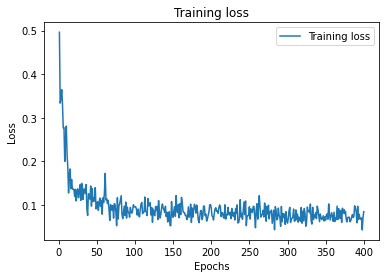

In [12]:
loss = history.history['loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### 모델 평가

In [13]:
test_mse_score = model.evaluate(X_test, Y_test)
print(f"test_mse_score = {test_mse_score}")
print(f"test_rmse_score = {np.sqrt(test_mse_score)}")

3/3 [==============================] - 0s 2ms/step - loss: 0.0277
test_mse_score = 0.02772745117545128
test_rmse_score = 0.16651561841296234


## 2. pytorch

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop(["species"],axis=1).values
y = df["species"].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### 모델 구축

In [19]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [20]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica
input_dim  = 4 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)

In [21]:
# creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [22]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [23]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [24]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0291, Test Loss: 0.0022
Epoch 100/1000, Train Loss: 0.0017, Test Loss: 0.0653
Epoch 150/1000, Train Loss: 0.0004, Test Loss: 0.0593
Epoch 200/1000, Train Loss: 0.0002, Test Loss: 0.0533
Epoch 250/1000, Train Loss: 0.0001, Test Loss: 0.0537
Epoch 300/1000, Train Loss: 0.0001, Test Loss: 0.0484
Epoch 350/1000, Train Loss: 0.0001, Test Loss: 0.0448
Epoch 400/1000, Train Loss: 0.0001, Test Loss: 0.0441
Epoch 450/1000, Train Loss: 0.0000, Test Loss: 0.0435
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.0421
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.0397
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.0379
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.0368
Epoch 700/1000, Train Loss: 0.0000, Test Loss: 0.0357
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.0352
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.0342
Epoch 850/1000, Train Loss: 0.0000, Test Loss: 0.0333
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.0328
Epoch 950/1000, Train Loss: 0

### 모델 학습

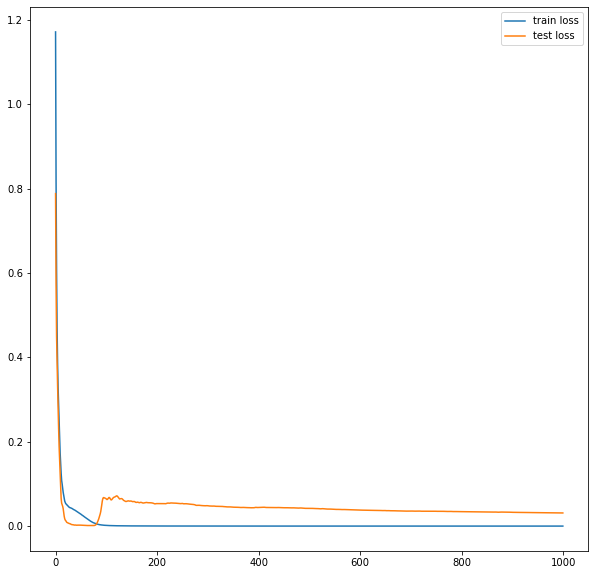

In [25]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

### 모델 평가

In [27]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [28]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [29]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 100.0
Test Accuracy: 97.778
